Task-03
• Build a decision tree classifier to predict whether a customer will purchase a product or service
based on their demographic and behavioral data. Use a dataset such as the Bank Marketing
dataset from the UCI Machine Learning Repository.
• Sample Dateset :- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
#Description
##Sources:
• Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
• Dataset: The data related to the direct marketing campaigns conducted by a Portuguese
banking institution.
##Problem Statement:
• This is a binary classification problem. I built a decision tree classifier. The goal is to predict
if the client contacted through the marketing campaign will subscribe to a term deposit.
0.1 Dataset Description:
• The data is related with direct marketing campaigns of a Portuguese banking institution.
• The marketing campaigns were based on phone calls. Often, more than one contact to the
same client was required, in order to access if the product (bank term deposit) would be (or
not) subscribed.
0.2 Attribute information:
• Number of Features : 45211
• Number of Attributes : 16 + output attribute.
0.3 Attributes Information:
bank client data: * 1 - age:age of client(numeric) * 2 - job : type of job (categorical:
“admin.”,“unknown”,“unemployed”,“management”,“housemaid”,“entrepreneur”,“student”,“blue￾collar”,“self-employed”,“retired”,“technician”,“services”) * 3 - marital : marital status (categorical:
“married”,“divorced”,“single”; note: “divorced” means divorced or widowed) * 4 - education
(categorical: “unknown”,“secondary”,“primary”,“tertiary”) * 5 - default: has credit in default?
(binary: “yes”,“no”) * 6 - balance: average yearly balance, in euros (numeric) * 7 - housing: has
housing loan? (binary: “yes”,“no”) * 8 - loan: has personal loan? (binary: “yes”,“no”) related
with the last contact of the current campaign: * 9 - contact: contact communication type
1
(categorical: “unknown”,“telephone”,“cellular”) * 10 - day: last contact day of the month (numeric) * 11 - month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
* 12 - duration: last contact duration, in seconds (numeric) other attributes: * 13 - campaign:
number of contacts performed during this campaign and for this client (numeric, includes last
contact) * 14 - pdays: number of days that passed by after the client was last contacted from
a previous campaign (numeric, -1 means client was not previously contacted) * 15 - previous:
number of contacts performed before this campaign and for this client (numeric) * 16 - poutcome:
outcome of the previous marketing campaign (categorical: “unknown”,“other”,“failure”,“success”)
Output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary:
“yes”,“no”)

**1 Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree

In [5]:
from google.colab import files
raw = files.upload()

Saving bank_data_set.csv to bank_data_set.csv


In [6]:
# Load the dataset
df=pd.read_csv('bank_data_set.csv')

In [7]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#Exploratory data analysis(EDA)

In [8]:
 # shallow copy
df2=df.copy()

In [9]:
#shape of a DataFrame.
df.shape

(45211, 17)

In [10]:
# Display all columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
# displays the top rows of a DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
#shows the bottom rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [13]:
 # specific rows of a DataFrame ( "integer location" Method)
df.iloc[100:200]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
100,44,blue-collar,married,secondary,no,-674,yes,no,unknown,5,may,257,1,-1,0,unknown,no
101,53,blue-collar,married,primary,no,90,no,no,unknown,5,may,124,1,-1,0,unknown,no
102,52,blue-collar,married,primary,no,128,yes,no,unknown,5,may,229,1,-1,0,unknown,no
103,59,blue-collar,married,primary,no,179,yes,no,unknown,5,may,55,3,-1,0,unknown,no
104,27,technician,single,tertiary,no,0,yes,no,unknown,5,may,400,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown,no
196,38,services,married,secondary,no,155,yes,no,unknown,5,may,248,1,-1,0,unknown,no
197,50,technician,divorced,tertiary,no,173,no,yes,unknown,5,may,98,1,-1,0,unknown,no
198,43,management,married,tertiary,no,400,yes,no,unknown,5,may,256,1,-1,0,unknown,no


In [14]:
# prints information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [15]:
# Display summary statistics for numerical columns in DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [16]:
# Dispaly (string) columns in the summary statistics.
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [17]:
# numerical columns list
numerical_data=df.select_dtypes(include=['int64','float64']).columns.to_list()
numerical_data

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [18]:
# object columns list
object_data=df.select_dtypes(include=['object']).columns.tolist()
print(object_data)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


**2 Data cleaning**

In [19]:
# To check for duplicate values in a DataFrame
df.duplicated().sum()

0

In [20]:
 # The number of missing values in the dataset.
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [21]:
#Observation: Our dataset do not have any null/nan/missing values.

**3 visualization**

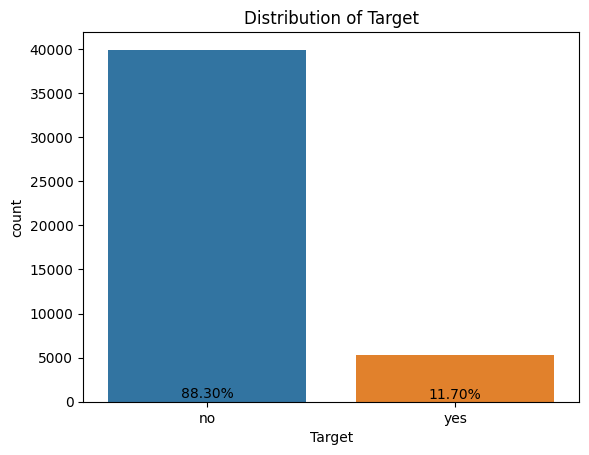

In [23]:
sns.countplot(x=df['y'])
plt.title('Distribution of Target')
plt.xlabel('Target')
value_counts = df['y'].value_counts()/df.shape[0]*100
for i, count in enumerate(value_counts):
   plt.text(i, count, f'{count:.2f}%', ha='center', va='bottom') # i for index # count for values # print the count which formatting

In [24]:
# Observation: dataset is highly imbalanced.

**4 Outliers**

In [25]:
# Calculate the IQR (Interquartile Range)
Q1 = df[numerical_data].quantile(0.25)
Q3 = df[numerical_data].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_outliers_removed = df[(df[numerical_data] >= lower_bound) & (df[numerical_data] <= upper_bound)]
df_outliers_removed.describe()

,age,balance,day,duration,campaign,pdays,previous
count,44724.000000,40482.000000,45211.000000,41976.000000,42147.000000,36954.0,36954.0
mean,40.545524,640.636233,15.806419,203.490947,2.129950,-1.0,0.0
std,9.978232,844.435442,8.322476,140.805074,1.315842,0.0,0.0
min,18.000000,-1944.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,33.000000,46.000000,8.000000,98.000000,1.000000,-1.0,0.0
50%,39.000000,349.000000,16.000000,167.000000,2.000000,-1.0,0.0
75%,48.000000,980.750000,21.000000,277.000000,3.000000,-1.0,0.0
max,70.000000,3462.000000,31.000000,643.000000,6.000000,-1.0,0.0


In [26]:
def remove_outliers(df, column):
# Calculate the IQR (Interquartile Range)
   Q1 = df[column].quantile(0.25)
   Q3 = df[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   df_outliers_removed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
   return df_outliers_removed

Text(0.5, 1.0, 'Box Plot of age')

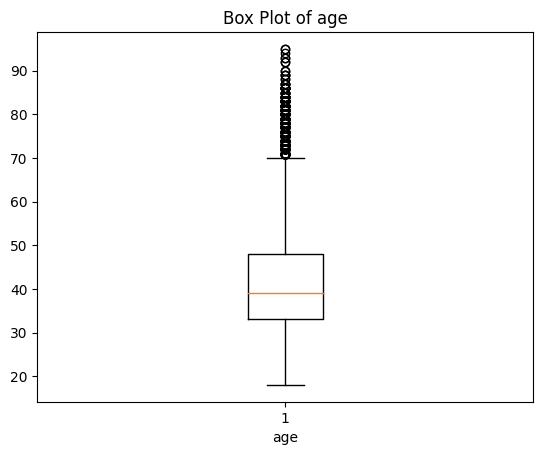

In [27]:
plt.boxplot(x=df['age'])
plt.xlabel('age')
plt.title('Box Plot of age')

In [28]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'KDE Plot of age')

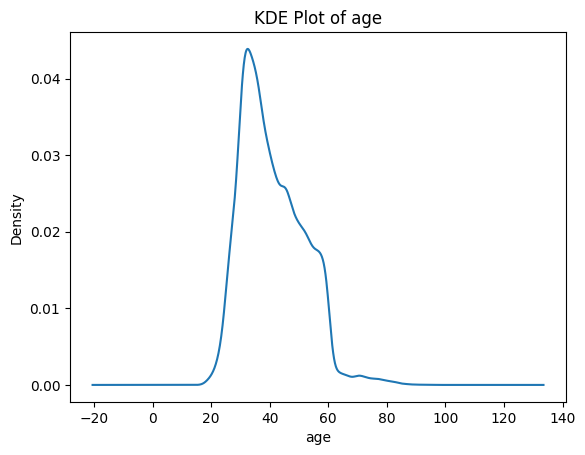

In [29]:
df['age'].plot.kde()
plt.xlabel('age')
plt.title('KDE Plot of age')

In [30]:
df.shape

(45211, 17)

In [31]:
# Remove outliers
df=remove_outliers(df,'age')
df['age'].describe()

count    44724.000000
mean        40.545524
std          9.978232
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

<Axes: xlabel='y', ylabel='pdays'>

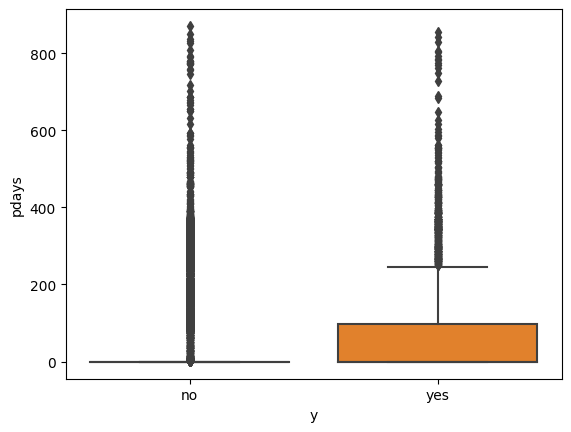

In [32]:
sns.boxplot(y=df['pdays'],x=df['y'])

In [33]:
df['pdays'].describe()

count    44724.000000
mean        40.000000
std        100.193608
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [34]:
# Remove outliers
df=remove_outliers(df,'pdays')

In [35]:
df['pdays'].describe()

count    36648.0
mean        -1.0
std          0.0
min         -1.0
25%         -1.0
50%         -1.0
75%         -1.0
max         -1.0
Name: pdays, dtype: float64

**Observation:** * There are outliers (’pdays) as we can see from boxplot. * after outlier mean of
Mean of pdays is -1

<Axes: xlabel='y', ylabel='previous'>

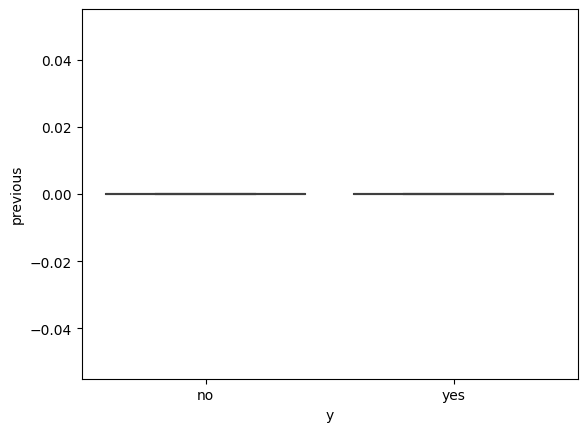

In [36]:
sns.boxplot(y=df['previous'],x=df['y'])

In [37]:
df['previous'].describe()

count    36648.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: previous, dtype: float64

In [38]:
# Remove outliers
df=remove_outliers(df,'previous')
df['previous'].describe()

count    36648.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: previous, dtype: float64

**Observation:** * There are outliers (previous) already remove (‘Pday’) columns * after outliers all
describe function maximum 0

<Axes: xlabel='y', ylabel='day'>

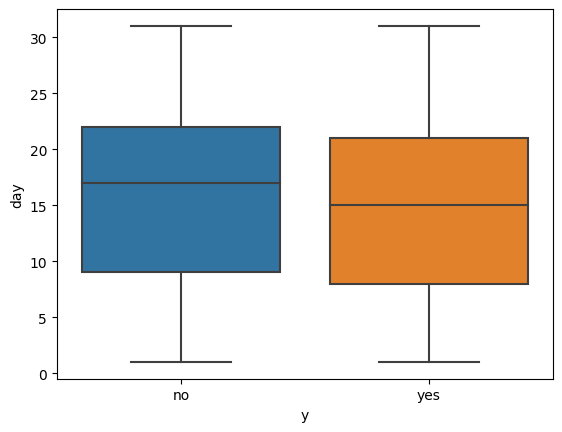

In [39]:
sns.boxplot(y=df['day'],x=df['y'])

**Observation:** * There are no outliers (days) as we can see from boxplot.

In [40]:
# converting call duration from seconds to minute
df['duration'] = df['duration']/60

In [42]:
df['duration'].describe()

count    36648.000000
mean         4.288495
std          4.372761
min          0.000000
25%          1.683333
50%          2.950000
75%          5.283333
max         81.966667
Name: duration, dtype: float64

<Axes: xlabel='y', ylabel='duration'>

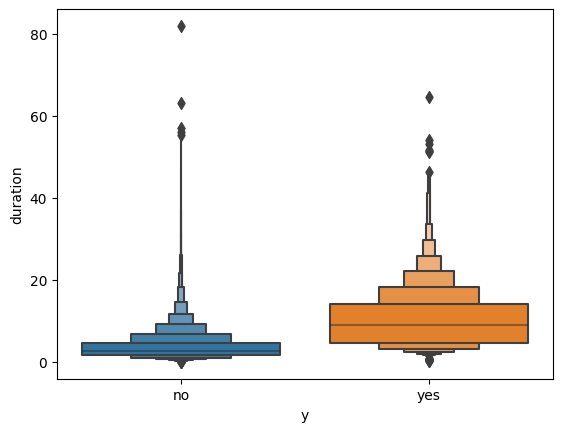

In [43]:
sns.boxenplot(y=df['duration'],x=df['y'])

In [44]:
# Remove outliers
df=remove_outliers(df,'duration')
df['duration'].describe()

count    33949.000000
mean         3.342183
std          2.338945
min          0.000000
25%          1.600000
50%          2.733333
75%          4.533333
max         10.683333
Name: duration, dtype: float64

**Observation:** * There are outliers (‘duration’) as we can see from boxplot. * after outliers
maximum of duration 10

<Axes: xlabel='y', ylabel='campaign'>

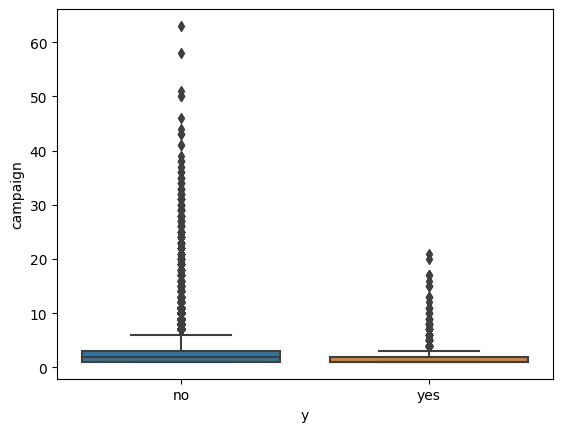

In [45]:
sns.boxplot(y=df['campaign'],x=df['y'])

In [46]:
df['campaign'].describe()

count    33949.000000
mean         2.943828
std          3.376793
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [47]:
# Remove outliers
df=remove_outliers(df,'campaign')
df['campaign'].describe()

count    31275.000000
mean         2.185995
std          1.341735
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: campaign, dtype: float64

Observation: * There are outliers (campaign) as we can see from boxplot. * after outliers maximum of campaign 6.0

<Axes: xlabel='y', ylabel='balance'>

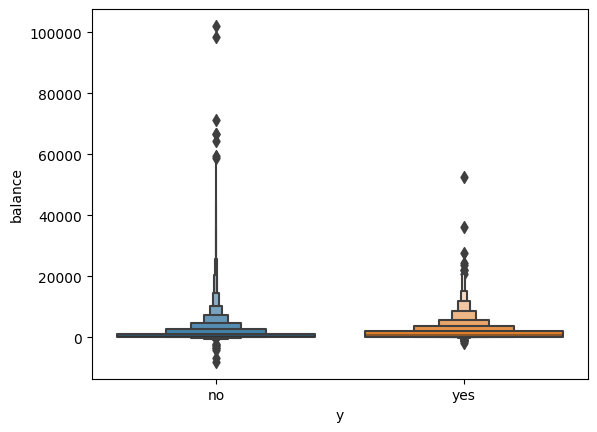

In [48]:
sns.boxenplot(x=df['y'],y=df['balance'])

In [49]:
df['balance'].describe()

count     31275.000000
mean       1299.529816
std        3045.431847
min       -8019.000000
25%          53.000000
50%         406.000000
75%        1334.500000
max      102127.000000
Name: balance, dtype: float64

In [50]:
# Remove outliers
df=remove_outliers(df,'balance')
df['balance'].describe()

count    27930.000000
mean       583.151916
std        794.690176
min      -1854.000000
25%         30.000000
50%        311.000000
75%        892.750000
max       3255.000000
Name: balance, dtype: float64

Observation: * There are outliers (‘balance’) as we can see from boxplot. * after outlier mean of
583

In [51]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [52]:
object_data

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

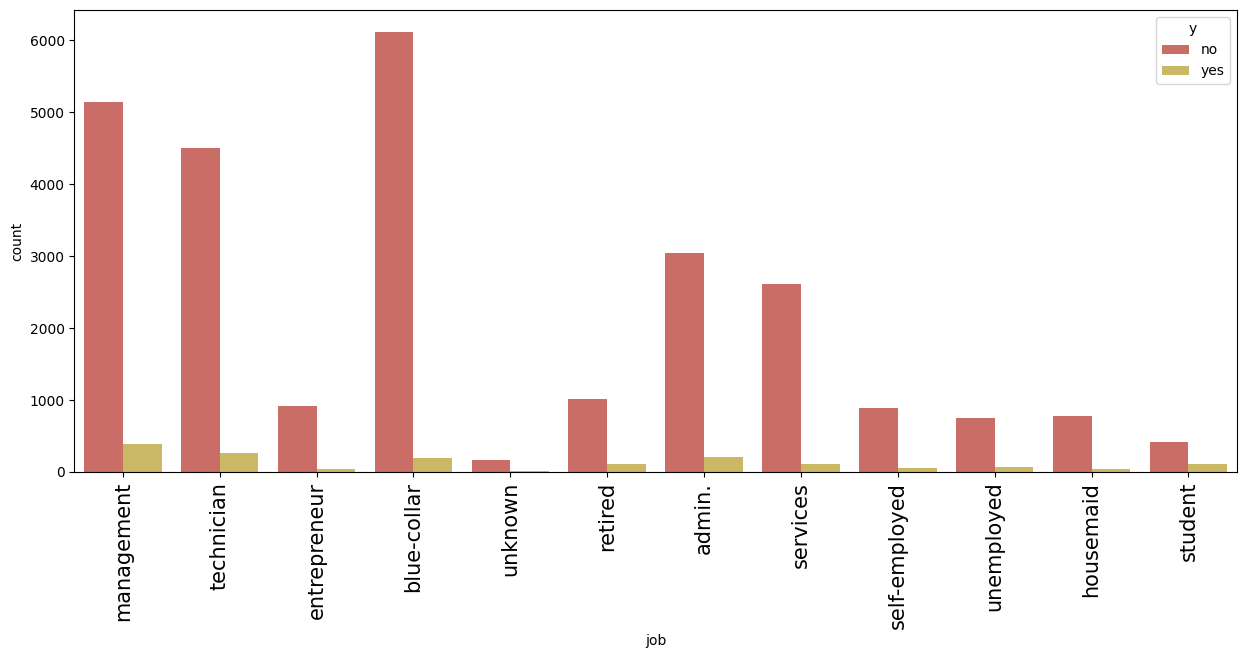

In [53]:
plt.figure(figsize=(15, 6))
jobs=df['job'].value_counts().sort_values(ascending=False)
sns.countplot(x=df['job'], hue=df['y'],palette=sns.color_palette("hls", 8))
plt.xticks(rotation=90,fontsize=15)
plt.show()

In [54]:
jobs

blue-collar      6308
management       5531
technician       4764
admin.           3245
services         2724
retired          1128
entrepreneur      958
self-employed     945
housemaid         813
unemployed        812
student           528
unknown           174
Name: job, dtype: int64

Observation: * Top contacted clients are from job type: ‘blue-collar’, ‘management’ & ‘technician’

In [55]:
df['marital'].value_counts()

married     16807
single       7822
divorced     3301
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

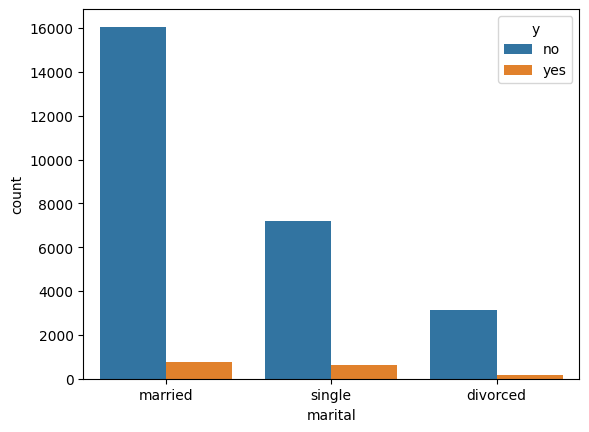

In [56]:
sns.countplot(x=df['marital'],hue=df['y'])

Observation: * Top client married

<Axes: xlabel='education', ylabel='count'>

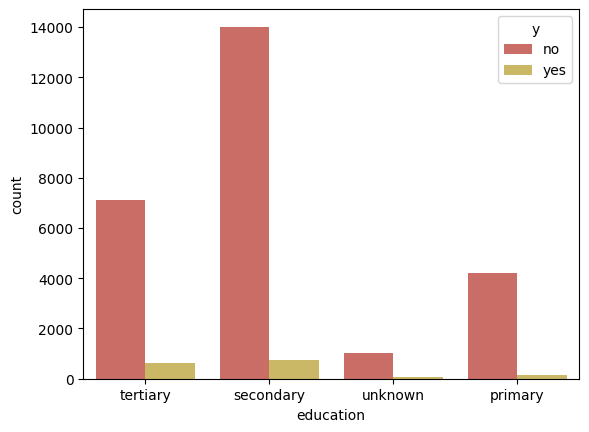

In [57]:
sns.countplot(x=df['education'],hue=df['y'],palette=sns.color_palette("hls", 8))

Observation
• Most of the people who are contacted have secondary or tertiray education.

In [58]:
df['default'].value_counts()

no     27304
yes      626
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='count'>

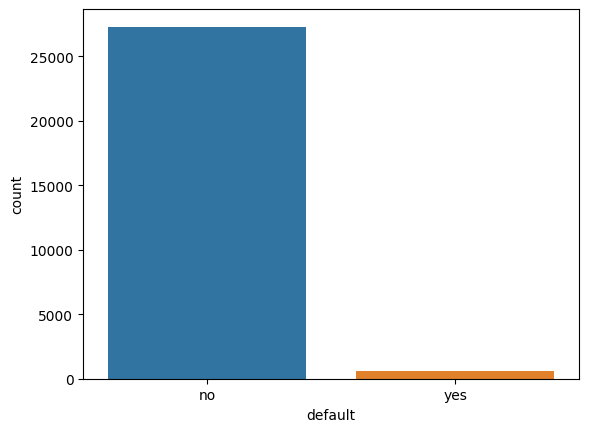

In [59]:
sns.countplot(x=df['default'])

In [60]:
df[df['default'] == 'yes'].y.count()

626

Observation: * very few clients are (default[yes])

In [61]:
df['housing'].value_counts()

yes    15510
no     12420
Name: housing, dtype: int64

<Axes: xlabel='housing', ylabel='count'>

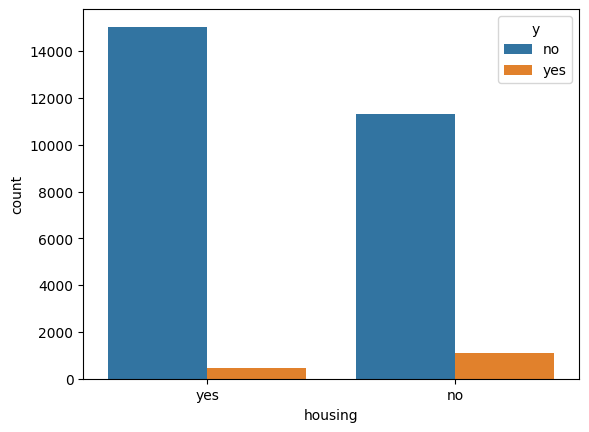

In [62]:
sns.countplot(x=df['housing'],hue=df['y'])

Observation: * Most of the people (housing_“yes”)

In [63]:
df['loan'].value_counts()

no     23003
yes     4927
Name: loan, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

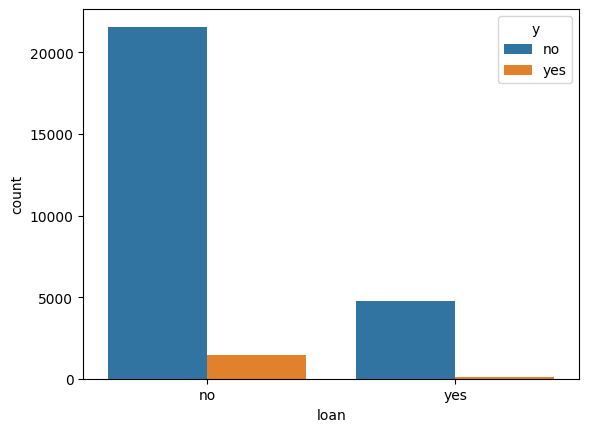

In [64]:
sns.countplot(x=df['loan'],hue=df['y'])

<Axes: xlabel='month', ylabel='count'>

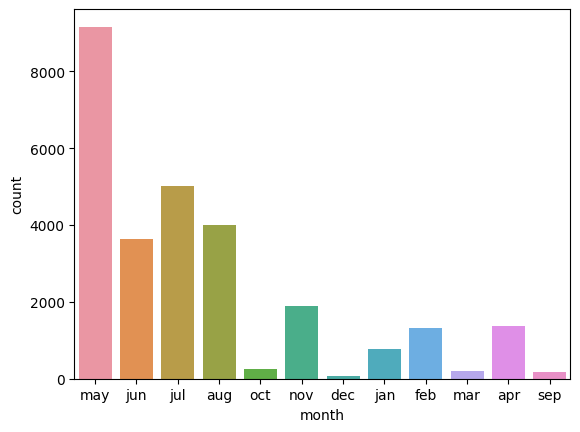

In [65]:
sns.countplot(x=df['month'])

<Axes: xlabel='contact', ylabel='count'>

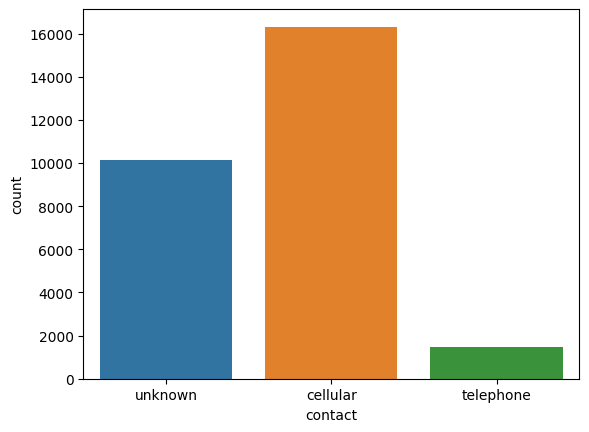

In [66]:
sns.countplot(x=df['contact'])

<Axes: xlabel='poutcome', ylabel='count'>

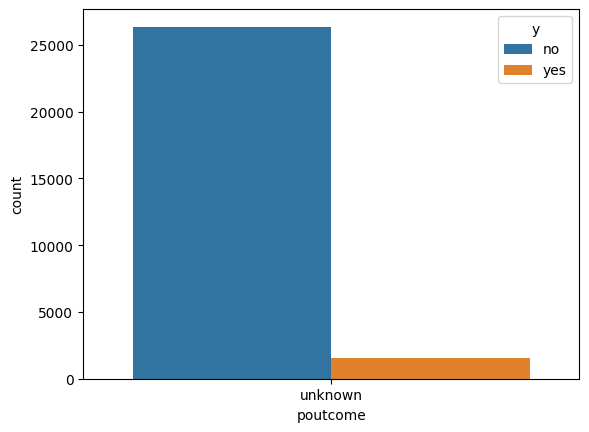

In [67]:
sns.countplot(x=df['poutcome'],hue=df['y'])

Observation: * Most of the clients contacted have previous outcome as ’unknown

In [68]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.266667,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533333,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300000,1,-1,0,unknown,no


<ipython-input-69-4de9ceedb513>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues',annot=True)


<Axes: >

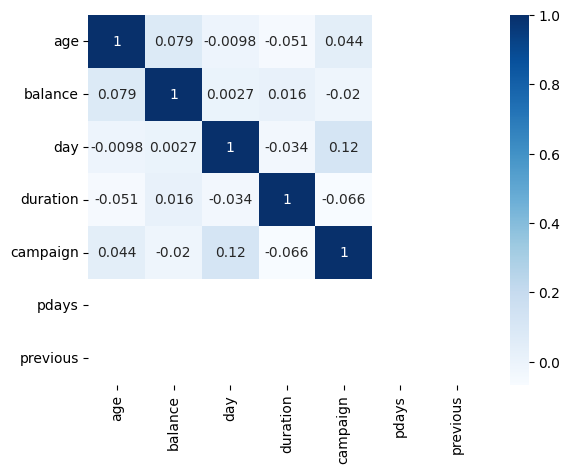

In [69]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

Observation:
• Over numerical features have very less correlation between them.

**5 DATA ENCODER**

In [70]:
print(object_data)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [71]:
le=LabelEncoder()
df['y']=le.fit_transform(df['y'])
df['job']=le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['default']=le.fit_transform(df['default'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df['contact']=le.fit_transform(df['contact'])
df['month']=le.fit_transform(df['month'])
df=pd.get_dummies(df,columns=['education'])
df['poutcome']=le.fit_transform(df['poutcome'])

In [72]:
df

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_0,education_1,education_2,education_3
0,58,4,1,0,2143,1,0,2,5,8,4.350000,1,-1,0,0,0,0,0,1,0
1,44,9,2,0,29,1,0,2,5,8,2.516667,1,-1,0,0,0,0,1,0,0
2,33,2,1,0,2,1,1,2,5,8,1.266667,1,-1,0,0,0,0,1,0,0
3,47,1,1,0,1506,1,0,2,5,8,1.533333,1,-1,0,0,0,0,0,0,1
4,33,11,2,0,1,0,0,2,5,8,3.300000,1,-1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,4,1,0,1428,0,0,0,16,9,5.550000,2,-1,0,0,0,0,0,1,0
45202,34,0,2,0,557,0,0,0,17,9,3.733333,1,-1,0,0,1,0,1,0,0
45203,23,8,2,0,113,0,0,0,17,9,4.433333,1,-1,0,0,1,0,0,1,0
45205,25,9,2,0,505,0,1,0,17,9,6.433333,2,-1,0,0,1,0,1,0,0


#Features (x) and Target (y) Split:

In [73]:
x=df.drop(columns=['y'])
y=df['y']

**6 StandardScaler**

In [74]:
ssr=StandardScaler()
x=ssr.fit_transform(x)

#Data split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [76]:
x

array([[ 1.78693298, -0.09288467, -0.2653789 , ..., -1.05917738,
         1.61885443, -0.20248181],
       [ 0.36976714,  1.41910317,  1.37408862, ...,  0.94412893,
        -0.61772077, -0.20248181],
       [-0.74372031, -0.6976798 , -0.2653789 , ...,  0.94412893,
        -0.61772077, -0.20248181],
       ...,
       [-1.75598163,  1.1167056 ,  1.37408862, ..., -1.05917738,
         1.61885443, -0.20248181],
       [-1.55352937,  1.41910317,  1.37408862, ...,  0.94412893,
        -0.61772077, -0.20248181],
       [ 1.68570685, -1.00007737, -0.2653789 , ...,  0.94412893,
        -0.61772077, -0.20248181]])

#Decision Tree

In [77]:
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [78]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [79]:
cr=classification_report(y_test,y_pred)
print('classification_report\n',cr)
acc=accuracy_score(y_test,y_pred)*100
print('accuracy:',acc)
err=np.mean(y_pred!=y_test)*100
print('Error value',err)
cm=confusion_matrix(y_test,y_pred)
print('confusion_matrix\n',cm)

classification_report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      7903
           1       0.34      0.38      0.36       476

    accuracy                           0.92      8379
   macro avg       0.65      0.67      0.66      8379
weighted avg       0.93      0.92      0.92      8379

accuracy: 92.29024943310658
Error value 7.709750566893423
confusion_matrix
 [[7554  349]
 [ 297  179]]


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

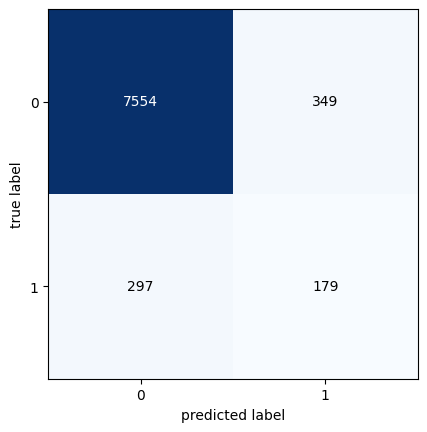

In [80]:
plot_confusion_matrix(cm)